In [5]:
# story z score shows story similarity, window z score schows window similarity, MIGHT need more data for fig 1f -- different windows' comparison

import numpy as np
import pandas as pd

scores = np.load('scores/S3/perceived_speech/wheretheressmoke.npz', allow_pickle=True)
print(scores.files)
score_names = ['window_scores', 'window_zscores', 'story_scores', 'story_zscores']
score_files = {}
for name in score_names:
    score_files[name] = scores[name].item()

print(score_files['story_zscores'])

['window_scores', 'window_zscores', 'story_scores', 'story_zscores']
{('wheretheressmoke', 'WER'): np.float64(11.237735444843862), ('wheretheressmoke', 'BLEU'): np.float64(8.449388576009925), ('wheretheressmoke', 'METEOR'): np.float64(8.776122412221744), ('wheretheressmoke', 'BERT'): np.float32(18.082968)}


In [17]:
zscores = {'subject': [], 'WER':[],'BLEU':[], 'METEOR':[], 'BERT':[]}

for i in range(1,4):
    scores = np.load(f'scores/S{i}/perceived_speech/wheretheressmoke.npz', allow_pickle=True)
    score_names = ['window_scores', 'window_zscores', 'story_scores', 'story_zscores']
    score_files = {}
    for name in score_names:
        score_files[name] = scores[name].item()
    print(score_files['story_zscores'])
    zscores['subject'].append(i)
    for k,v in score_files['story_zscores'].items():
        zscores[k[1]].append(v)

{('wheretheressmoke', 'WER'): np.float64(7.996444000858539), ('wheretheressmoke', 'BLEU'): np.float64(5.112535100022449), ('wheretheressmoke', 'METEOR'): np.float64(6.382381704503436), ('wheretheressmoke', 'BERT'): np.float32(15.008864)}
{('wheretheressmoke', 'WER'): np.float64(9.151366158323304), ('wheretheressmoke', 'BLEU'): np.float64(10.071054103081593), ('wheretheressmoke', 'METEOR'): np.float64(13.45476263618265), ('wheretheressmoke', 'BERT'): np.float32(19.886879)}
{('wheretheressmoke', 'WER'): np.float64(11.237735444843862), ('wheretheressmoke', 'BLEU'): np.float64(8.449388576009925), ('wheretheressmoke', 'METEOR'): np.float64(8.776122412221744), ('wheretheressmoke', 'BERT'): np.float32(18.082968)}


In [19]:
results_df = pd.DataFrame(zscores)
results_df

,subject,WER,BLEU,METEOR,BERT
0,1,7.996444,5.112535,6.382382,15.008864
1,2,9.151366,10.071054,13.454763,19.886879
2,3,11.237735,8.449389,8.776122,18.082968


In [ ]:
print(len(score_files['window_scores'][('wheretheressmoke', 'WER')]))

563


In [27]:
results = np.load('results/S1/perceived_speech/wheretheressmoke.npz', allow_pickle=True)
result_names = results.files
result_files={}
for name in result_names:
    result_files[name] = results[name]
result_files

{'words': array(['she', 'said', 'she', ..., 'that', 'she', 'needs'],
       shape=(1589,), dtype='<U13'),
 'times': array([ 10.2,  10.6,  11. , ..., 591. , 591.4, 591.8], shape=(1589,))}

IndexError: index 1000 is out of bounds for axis 0 with size 1000

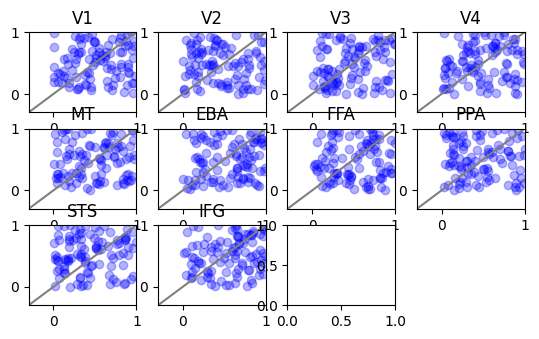

In [19]:
from utils_ridge import util

util.plot_model_comparison_rois(np.random.rand(1000), np.random.rand(1000), "Model 1", "Model 2", [np.arange(100*i, 100*(i+1)) for i in range(16)], ["V1", "V2", "V3", "V4", "MT", "EBA", "FFA", "PPA", "STS", "IFG", "STG", "MTG", "Auditory", "Speech", "Semantic", "Motor"], thresh=0.35)
